In [4]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import torchvision.datasets as datasets
#from vae import VAE
from vaecnn import VAECNN
#from util import train,test

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25

def show_dataset(dataset, n=6):
#     img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
#                    for i in range(len(dataset))))
    img = np.hstack(dataset[i][0]
                    for i in range(len(dataset)))
    plt.imshow(img)
    plt.axis('off')

In [6]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

In [7]:
args = Namespace(
    batch_size = 5,
    epochs = 10,
    cuda = True,
    seed = 2019,
    log_interval = 1)

In [8]:
torch.manual_seed(2019)
device = torch.device("cuda")

In [9]:
model = VAECNN().to(device)

In [10]:
## load parameters
# to load
checkpoint = torch.load('vaetest3.pth.tar')
model.load_state_dict(checkpoint['model_state_dict'])

In [11]:
#kwargs = {'num_workers': 1, 'pin_memory': True} if args.cuda else {}
kwargs = {}

# trainDataDir = '/scratch/um367/DL/data/sample_4/train'
# valDataDir = '/scratch/um367/DL/data/sample_4/val'
trainDataDir = '/scratch/um367/DL/data/sampledata/supervised/train'
valDataDir = '/scratch/um367/DL/data/sampledata/supervised/val'

train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(trainDataDir, transform=transforms.ToTensor()),
    batch_size=args.batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(valDataDir, transform=transforms.ToTensor()),
    batch_size=args.batch_size, shuffle=True, **kwargs)

In [12]:
for batch_idx, (data, labels) in enumerate(train_loader):
    data = data.to(device)
    print(batch_idx)
    print(data.shape)
    print(labels)
    with torch.no_grad():
        recon_batch, mu, logvar,_ = model(data)
    print(recon_batch.shape)
    #print(np.asarray(data[0]).shape)
    #imshow(np.asarray(data[5]).reshape(data[1].shape[1],data[1].shape[2],data[1].shape[0]))
    #show_dataset(data, n=5)
    if batch_idx ==0:
        break

0
torch.Size([5, 3, 96, 96])
tensor([14, 10,  4,  2,  0])
torch.Size([5, 3, 96, 96])


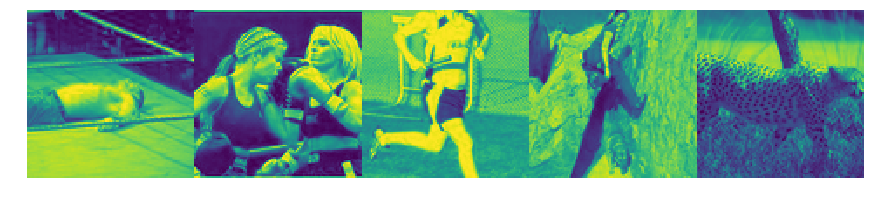

In [13]:
show_dataset(data, n=5)

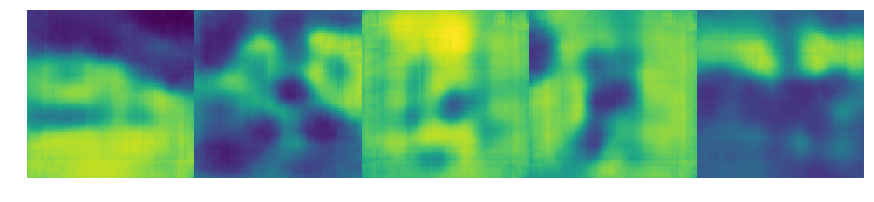

In [14]:
show_dataset(recon_batch, n=5)